#Лабораторная работа №3

Создание нейронной сети, выполняющей предсказание непрерывной величины

In [754]:
%%capture
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

In [755]:
import pandas as pd
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data.head()
test_data = test_data.dropna()
test_data = test_data._get_numeric_data()

Ниже в таблице представлено описание каждого из 12 полей.

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Легальный статус авто  (все документы в наличии)|**weather**     |Среднегодовая температура в городе продажи|


Проверим данные на наличие пропусков и типов переменных

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно вызвать у переменной *training_data* метод **info()**.

In [756]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


Анализируем результата выполнения команды:

* 4913 строк (entries)
* 12 столбцов (Data columns)

В данных присутствует три типа dtypes:
* int64 - целое число  (5 столбцов)
* float64 - дробное число (3 столбца)
* object - не число, обычно текст (4 столбца)

В нашем случае признаки с типом object имеют текстовые значения.

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (4913).

Для удобства работы выкинем NaN данные из нашего датасета, применив метод **dropna()** к *training_data*:

In [757]:
training_data = training_data.dropna()

С помощью метода **_get_numeric_data()** оставим столбцы, содержащие только числовые данные.

In [758]:
training_data = training_data._get_numeric_data()

In [759]:
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


In [760]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

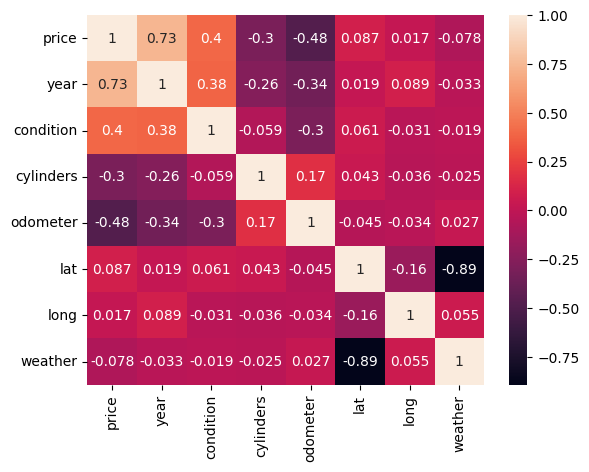

In [762]:
cols = ['price', 'year', 'condition', 'cylinders', 'odometer', 'lat', 'long', 'weather']
hm = sns.heatmap(training_data[cols].corr(),
                 cbar=True,
                 annot=True)

In [763]:
X = training_data[['year']].values
y = training_data['price'].values

In [764]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)
y_pred = linReg.predict(X)

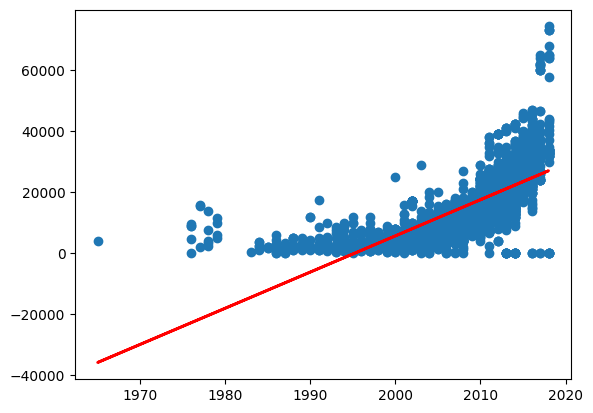

In [765]:
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2);

In [766]:
from sklearn.model_selection import train_test_split

In [767]:
x_train = training_data[['price']].values

In [768]:
y_train = training_data['year'].values

In [769]:
x_test = test_data[['price']].values

In [770]:
y_test = test_data['year'].values

In [771]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_train_pred = linReg.predict(x_train)
y_test_pred = linReg.predict(x_test)

In [772]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 2.963, test: 2.900
MSE train: 20.642, test: 19.043
R^2 train: 0.539, test: 0.568


In [773]:
X = training_data[['price']].values
y = training_data['odometer'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [774]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)

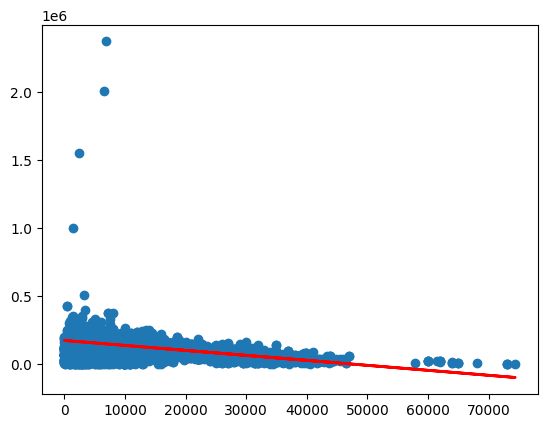

In [775]:
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2);

In [776]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [777]:
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 37350.006, test: 34270.319
MSE train: 6292823700.802, test: 2852874386.547
R^2 train: 0.194, test: 0.370


In [778]:
from sklearn.model_selection import train_test_split
X = training_data[['price']].values
y = training_data['condition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [779]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)

LinearRegression()

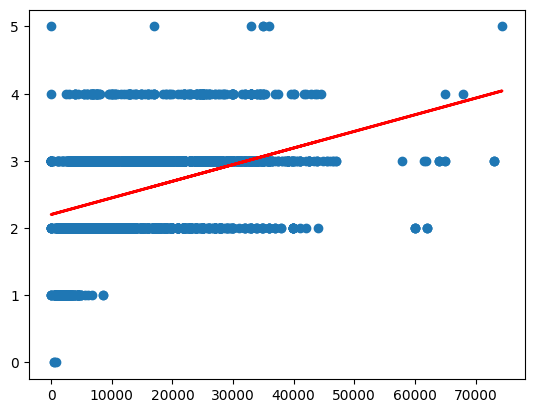

In [780]:
plt.scatter(X, y)
plt.plot(X, linReg.predict(X), color='red', linewidth=2);

In [781]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_train_pred = linReg.predict(X_train)
y_test_pred = linReg.predict(X_test)

In [782]:
print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 0.516, test: 0.475
MSE train: 0.389, test: 0.328
R^2 train: 0.154, test: 0.183


In [783]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [784]:
x_train = training_data
y_train =  training_data['price'].values
x_train

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...
4906,14850,2014,4,6,39000,32.608400,-117.056500,59.0
4907,5979,1999,2,8,178825,42.550206,-114.462303,47.0
4908,21480,2013,3,8,64412,44.409987,-89.880544,45.0
4909,1,2014,3,6,117123,29.975385,-90.172386,67.0


In [785]:
y_train

array([43900, 15490,  2495, ..., 21480,     1, 16500], dtype=int64)

In [786]:
x_test = test_data
x_test

,price,year,condition,cylinders,odometer,lat,long,weather
0,5990,2004,4,8,210445,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,36.060541,-95.795447,57.0
8,20495,2013,3,6,108500,42.612400,-83.034500,45.0
9,6000,2000,3,8,69600,32.832296,-97.169012,67.0
...,...,...,...,...,...,...,...,...
2097,62995,2017,3,6,22973,34.244046,-77.860915,56.0
2099,22500,2015,3,6,23500,32.680700,-117.169800,59.0
2100,5975,2005,2,8,0,38.213303,-85.785762,50.0
2102,10900,2011,2,8,164000,43.140600,-93.385000,47.0


In [787]:
y_test = test_data['price'].values
y_test

array([ 5990, 18995, 23500, ...,  5975, 10900, 18000], dtype=int64)

In [788]:
model = models.Sequential()

model.add(layers.Dense(30, kernel_initializer='uniform',activation = "relu"))
model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "Adam",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 1,
 validation_data = (x_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 3s 695us/step - loss: 3071.1917 - mean_absolute_error: 3071.1917 - mean_squared_error: 48236320.0000 - val_loss: 109.2506 - val_mean_absolute_error: 109.2506 - val_mean_squared_error: 28529.4902
Epoch 2/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step - loss: 189.5892 - mean_absolute_error: 189.5892 - mean_squared_error: 108088.8125 - val_loss: 449.0863 - val_mean_absolute_error: 449.0863 - val_mean_squared_error: 247215.4531
Epoch 3/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - loss: 160.6330 - mean_absolute_error: 160.6330 - mean_squared_error: 63107.5156 - val_loss: 1504.1599 - val_mean_absolute_error: 1504.1599 - val_mean_squared_error: 3522161.5000
Epoch 4/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - loss: 259.0948 - mean_absolute_error: 259.0948 - mean_squared_error: 310161.6875 - val_loss: 1014.2498 - val_mean_absolute_error: 1014.2498 - val_mean_squared_error: 2020058.6250
Epoch 5/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step 

In [790]:
model = models.Sequential()

model.add(layers.Dense(30, kernel_initializer='uniform',activation = "relu"))
model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "Adamax",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 1,
 validation_data = (x_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 3s 624us/step - loss: 4842.2930 - mean_absolute_error: 4842.2930 - mean_squared_error: 70305320.0000 - val_loss: 159.5362 - val_mean_absolute_error: 159.5362 - val_mean_squared_error: 57835.6484
Epoch 2/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - loss: 72.7214 - mean_absolute_error: 72.7214 - mean_squared_error: 23787.3672 - val_loss: 27.9309 - val_mean_absolute_error: 27.9309 - val_mean_squared_error: 1852.2860
Epoch 3/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - loss: 61.7923 - mean_absolute_error: 61.7923 - mean_squared_error: 8108.1230 - val_loss: 98.1369 - val_mean_absolute_error: 98.1369 - val_mean_squared_error: 12690.7119
Epoch 4/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 3s 689us/step - loss: 61.5998 - mean_absolute_error: 61.5998 - mean_squared_error: 9256.5703 - val_loss: 64.9565 - val_mean_absolute_error: 64.9565 - val_mean_squared_error: 5055.0864
Epoch 5/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - loss: 62.0654 - mean_abso

In [791]:
model = models.Sequential()

model.add(layers.Dense(30, kernel_initializer='uniform',activation = "selu"))
model.add(layers.Dense(1, activation = 'linear'))

model.compile(
 optimizer = "Adamax",
 loss = "mean_absolute_error",
 metrics = ["mean_absolute_error", "mean_squared_error"]
)
results = model.fit(
 x_train, y_train,
 epochs= 10,
 batch_size = 1,
 validation_data = (x_test, y_test)
)
print("Test-MAE:", results.history["mean_absolute_error"])
print("Test-MSE:", results.history["mean_squared_error"])

Epoch 1/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 3s 658us/step - loss: 4915.2832 - mean_absolute_error: 4915.2832 - mean_squared_error: 72703408.0000 - val_loss: 38.8989 - val_mean_absolute_error: 38.8989 - val_mean_squared_error: 33203.5469
Epoch 2/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 629us/step - loss: 80.6063 - mean_absolute_error: 80.6063 - mean_squared_error: 22269.9531 - val_loss: 75.6726 - val_mean_absolute_error: 75.6726 - val_mean_squared_error: 8040.2637
Epoch 3/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step - loss: 59.3186 - mean_absolute_error: 59.3186 - mean_squared_error: 10151.1963 - val_loss: 75.5256 - val_mean_absolute_error: 75.5256 - val_mean_squared_error: 10876.1582
Epoch 4/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - loss: 59.2880 - mean_absolute_error: 59.2880 - mean_squared_error: 10039.7002 - val_loss: 11.0736 - val_mean_absolute_error: 11.0736 - val_mean_squared_error: 444.4950
Epoch 5/10
3659/3659 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step - loss: 63.9069 - mean_absol

**Задание (базовый уровень):**
Создать нейронную сеть, которая будет предсказывать цену автомобиля на основе числовых полей исходного датасета (оценку качества регрессора проводить на основе метрик MAE, MSE).